In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sys
import os
import time
import scipy
import pickle
from importlib import reload
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error
from collections import namedtuple
import keras_tuner as kt 
codebase_path = '/data/home/wpw035/Codebase'
sys.path.insert(0, codebase_path) #add path to my codebase models
from scipy.optimize import curve_fit

In [2]:
from DRP_utils import data_preprocessing as dp_nb
reload(dp_nb)
from DRP_utils import model_selection as ms_nb
reload(ms_nb)
from DRP_utils import testing as t_nb
reload(t_nb)
import Data_imports as di_nb
reload(di_nb)
import pairs_train_test_split as tts_nb
import Learning_curve as lc_nb

In [3]:
#read and format phos data
phos_path ='/downloaded_data_small/suppData2ppIndexPhospo.csv'
phos_raw = pd.read_csv(f'{codebase_path}{phos_path}')
#makes index features 
phos_raw.index = phos_raw['col.name']
phos_raw.drop(columns='col.name', inplace=True)
#formats cell lines in the same way as in target value df. 
phos_raw.columns = [c.replace('.', '-') for c in phos_raw.columns]
phos_raw = phos_raw.T


#log transfrom
phospho_log = np.log2(phos_raw).replace(-np.inf, 0)
#norm by cell line standard scale 
scale = StandardScaler()
phospho_ls = pd.DataFrame(scale.fit_transform(phospho_log.T),
                       columns = phospho_log.index,
                       index = phospho_log.columns).T




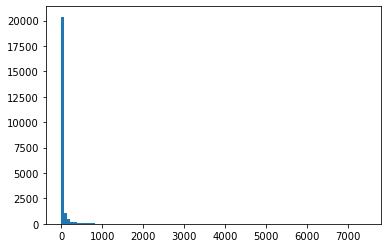

In [64]:
plt.hist(phos_raw.iloc[0], bins=100)
plt.show()

In [58]:
ss = sklearn.preprocessing.StandardScaler()
phos_ss = ss.fit_transform(phos_raw.T).T

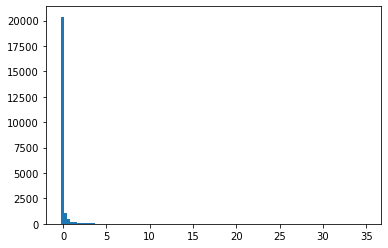

In [61]:
plt.hist(phos_ss[0], bins=100)
plt.show()

In [63]:
phos_ss[0]

array([-0.19458193, -0.21739484, -0.2066778 , ..., -0.21739484,
       -0.19841663, -0.16816511])

/tmp/2692019.1.all.q/ipykernel_107857/1035737528.py:1: RuntimeWarning: invalid value encountered in log2
  plt.hist(np.log2(phos_ss[0]), bins=100)


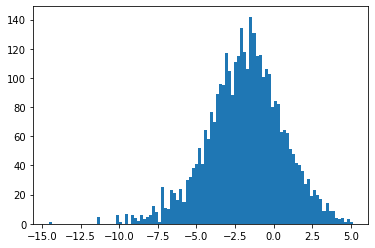

In [62]:
plt.hist(np.log2(phos_ss[0]), bins=100)
plt.show()

In [27]:
np.log2(phos_ss[0])

/tmp/2692019.1.all.q/ipykernel_107857/1210913952.py:1: RuntimeWarning: invalid value encountered in log2
  np.log2(phos_ss[0])


array([        nan,         nan,         nan, ...,         nan,
       -0.44990181,         nan])

In [28]:
phos_ss[0]

array([-0.26787594, -0.57567559, -1.17901039, ..., -0.3808301 ,
        0.73209267, -0.13567594])

In [67]:
ss2 = sklearn.preprocessing.StandardScaler()
phos_lgss = ss.fit_transform(np.log2(phos_raw).T).T

In [71]:
np.log2(phos_raw)

col.name,KDM1A(S45);,KDM1A(T19);,ZFP91(S69);,INCENP(T150);,INCENP(T153);,INCENP(T153);INCENP(T135);,INCENP(M136);INCENP(T145);INCENP(S148);,EIF3J(S11);EIF3J(S13);,POLE4(S9);,SAMD1(T157);,...,CTDP1(T340);,EPS8L2(T572);,BEGAIN(S455);,HNRNPL(S52);,GMDS(T327);,BOD1L1(S482);BOD1L1(S484);,ARHGEF35(T193);,ARHGEF5(S184);,PSMB2(T148);,HSP90AA1(S476);
AML-193,2.269033,-9.643856,1.179511,2.018367,4.163760,3.392489,-9.643856,1.599318,1.485427,6.892391,...,2.356144,1.816088,7.098045,4.705978,3.078951,-9.643856,-9.643856,-9.643856,2.003602,3.378512
AML-193-1,2.430285,0.536053,4.953731,1.269847,4.069389,3.459610,-9.522178,0.215815,-0.325539,6.703211,...,0.594549,3.511134,6.333281,5.247928,3.270529,-9.522178,-9.522178,-9.522178,0.992768,2.823749
AML-193-2,-8.678903,-8.678903,5.098032,2.583144,5.366672,4.882154,-8.678903,2.729009,-8.678903,7.150763,...,3.082362,3.392653,6.672460,5.336283,2.778209,-8.678903,-8.678903,-8.678903,1.090853,2.545968
CMK,-9.751659,-9.751659,6.298313,3.897353,6.801432,6.270551,0.925999,2.077243,-9.751659,8.603255,...,-9.751659,-8.751659,4.683472,4.285402,-9.751659,-0.388355,-9.751659,-9.751659,0.575312,1.627607
CMK-1,2.443607,1.286881,1.945327,5.046578,7.249825,6.544114,0.411426,2.580145,-1.038006,8.711495,...,3.016140,-8.643856,3.801159,2.140779,-9.643856,-9.643856,-9.643856,-9.643856,-9.643856,1.189034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNU-475-1,-9.243318,-9.243318,4.403949,2.551307,5.112769,4.217359,-9.243318,-1.298140,4.700440,5.852998,...,-9.243318,7.897240,7.150763,3.817623,6.244126,-9.243318,1.655352,-9.243318,-9.243318,4.044394
SNU-475-2,1.344828,-9.702750,4.761232,3.543125,5.652521,4.554663,-9.702750,-1.271601,-9.702750,6.301953,...,-9.702750,7.871597,7.314697,3.632268,5.108524,-9.702750,2.419539,-9.702750,-9.702750,4.343408
THP-1,3.560715,-12.012705,5.699885,4.348374,6.466468,5.350506,-12.012705,1.406124,3.523562,7.360189,...,3.158660,1.170080,2.313246,1.757023,-12.012705,-12.012705,-12.012705,-12.012705,-12.012705,1.646163
THP-1-1,-12.156782,-12.156782,5.292782,4.175525,6.191409,5.244134,-12.156782,0.864112,3.090853,7.421223,...,0.823749,1.220466,4.271276,3.336283,-12.156782,0.250962,-12.156782,-12.156782,4.542258,1.839960


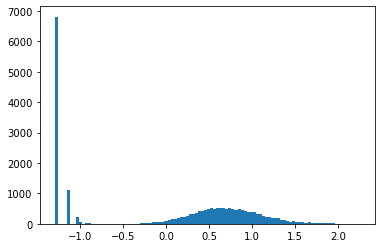

In [68]:
plt.hist(phos_lgss[6], bins=100)
plt.show()

In [44]:
phos_lgss

array([[ 0.6150219 , -0.63078412, -0.87148891, ..., -0.36844679,
         1.31270591,  0.25244258],
       [ 0.64054313,  1.19889573,  0.36110811, ..., -0.34212577,
         1.12642566, -0.02954449],
       [-1.11769815, -0.45734886,  0.40823448, ..., -0.159712  ,
         1.14450113, -0.17074127],
       ...,
       [ 0.81945522, -1.0565478 ,  0.60478948, ..., -0.88086679,
        -1.27027197, -0.6281148 ],
       [-1.66813883, -1.08244324,  0.47183646, ..., -0.91203277,
         1.78053896, -0.52960733],
       [-1.57108344, -0.97222468,  0.48941337, ..., -0.77938126,
         0.59438179, -0.85406992]])

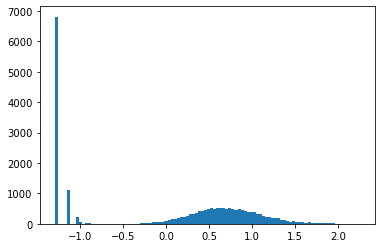

In [57]:
plt.hist(phospho_ls.iloc[6], bins=100)
plt.show()

In [50]:
sum((np.log2(phos_raw) == -np.inf).sum())

0

In [45]:
np.log2(phos_raw)

col.name,KDM1A(S45);,KDM1A(T19);,ZFP91(S69);,INCENP(T150);,INCENP(T153);,INCENP(T153);INCENP(T135);,INCENP(M136);INCENP(T145);INCENP(S148);,EIF3J(S11);EIF3J(S13);,POLE4(S9);,SAMD1(T157);,...,CTDP1(T340);,EPS8L2(T572);,BEGAIN(S455);,HNRNPL(S52);,GMDS(T327);,BOD1L1(S482);BOD1L1(S484);,ARHGEF35(T193);,ARHGEF5(S184);,PSMB2(T148);,HSP90AA1(S476);
AML-193,2.269033,-9.643856,1.179511,2.018367,4.163760,3.392489,-9.643856,1.599318,1.485427,6.892391,...,2.356144,1.816088,7.098045,4.705978,3.078951,-9.643856,-9.643856,-9.643856,2.003602,3.378512
AML-193-1,2.430285,0.536053,4.953731,1.269847,4.069389,3.459610,-9.522178,0.215815,-0.325539,6.703211,...,0.594549,3.511134,6.333281,5.247928,3.270529,-9.522178,-9.522178,-9.522178,0.992768,2.823749
AML-193-2,-8.678903,-8.678903,5.098032,2.583144,5.366672,4.882154,-8.678903,2.729009,-8.678903,7.150763,...,3.082362,3.392653,6.672460,5.336283,2.778209,-8.678903,-8.678903,-8.678903,1.090853,2.545968
CMK,-9.751659,-9.751659,6.298313,3.897353,6.801432,6.270551,0.925999,2.077243,-9.751659,8.603255,...,-9.751659,-8.751659,4.683472,4.285402,-9.751659,-0.388355,-9.751659,-9.751659,0.575312,1.627607
CMK-1,2.443607,1.286881,1.945327,5.046578,7.249825,6.544114,0.411426,2.580145,-1.038006,8.711495,...,3.016140,-8.643856,3.801159,2.140779,-9.643856,-9.643856,-9.643856,-9.643856,-9.643856,1.189034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SNU-475-1,-9.243318,-9.243318,4.403949,2.551307,5.112769,4.217359,-9.243318,-1.298140,4.700440,5.852998,...,-9.243318,7.897240,7.150763,3.817623,6.244126,-9.243318,1.655352,-9.243318,-9.243318,4.044394
SNU-475-2,1.344828,-9.702750,4.761232,3.543125,5.652521,4.554663,-9.702750,-1.271601,-9.702750,6.301953,...,-9.702750,7.871597,7.314697,3.632268,5.108524,-9.702750,2.419539,-9.702750,-9.702750,4.343408
THP-1,3.560715,-12.012705,5.699885,4.348374,6.466468,5.350506,-12.012705,1.406124,3.523562,7.360189,...,3.158660,1.170080,2.313246,1.757023,-12.012705,-12.012705,-12.012705,-12.012705,-12.012705,1.646163
THP-1-1,-12.156782,-12.156782,5.292782,4.175525,6.191409,5.244134,-12.156782,0.864112,3.090853,7.421223,...,0.823749,1.220466,4.271276,3.336283,-12.156782,0.250962,-12.156782,-12.156782,4.542258,1.839960
